<h1>Limpar aquivos 1k, 5k, 100k</h1>

<h2>Analisar estrutura de um tweet</h2>

In [1]:
import pandas as pd

tab_1 = pd.read_json('1_tweet.json',lines=True,convert_dates=False)
tab_1

,_id,quote_count,contributors,truncated,text,is_quote_status,in_reply_to_status_id,reply_count,id,favorite_count,...,geo,in_reply_to_user_id_str,possibly_sensitive,lang,extended_tweet,created_at,filter_level,in_reply_to_status_id_str,place,control
0,{'$numberLong': '1240986591545393153'},0,NaN,True,Covid-19: quem vai colher os erros de Bolsonar...,False,NaN,0,{'$numberLong': '1240986591545393153'},0,...,NaN,NaN,False,pt,"{'display_text_range': [0, 223], 'entities': {...",{'$date': '2020-03-19T10:00:34.000-0300'},low,NaN,NaN,{'coleta': [439]}


In [2]:
tab_1['user']

0    {'follow_request_sent': None, 'profile_use_bac...
Name: user, dtype: object

<h2>Criar arquivo com tweets por usuário por dia</h2>

In [24]:
import nltk
import re
import pandas as pd
from IPython.display import clear_output
from collections import defaultdict
import matplotlib.pyplot as plt
from string import punctuation

#stopwords em portugues
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese') + list(punctuation) + ['“','”'])

#funçao pra limpeza de texto
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

In [4]:
#funçao pra leitura de dados e criaçao de dataframe
def json_to_dataframe(nome_json, colunas, chunk=30):
    dados = pd.read_json(nome_json, convert_dates = False, lines = True, chunksize = chunk)    
    
    for df_tweets_retweets in dados:
        yield df_tweets_retweets[colunas]

In [5]:
#funçao pra limpar texto e retirar stopwords
def tokenizar_texto(texto_tweet):
    texto_tokenizado = tweet_tokenizer.tokenize(texto_tweet)

    if texto_tokenizado[0] == "rt" and texto_tokenizado[1] == ":":
        del texto_tokenizado[0]
    
    palavras_sem_stopwords = [palavra for palavra in texto_tokenizado if palavra not in stopwords] 
    return palavras_sem_stopwords

In [6]:
#funçao pra criar dicionario com a data e quantidade dos tweets por usuario
def contagem_usuarios_data(gerador,destino):
    
    dict_datas_usuarios = defaultdict(dict)            
    
    for dataframe in gerador:        
        for linha in dataframe.values:            
            usuario = linha[0]['screen_name']

            data = linha[1]['$date'][:10]
            if data not in dict_datas_usuarios or usuario not in dict_datas_usuarios[data]:
                dict_datas_usuarios[data][usuario] = 0
            dict_datas_usuarios[data][usuario] += 1
            clear_output()
            
    escrever_arq_csv(dict_datas_usuarios,destino)

In [7]:
#funçao pra escrever os resultados no arquivo csv
def escrever_arq_csv(dict_datas_usuarios,destino):
    with open(destino, 'w', encoding="utf-8") as f:
        f.write("Datas;Usuários;Tweets\n")

        for key in dict_datas_usuarios.keys():
            for user in dict_datas_usuarios[key].keys():
                f.write("%s;%s;%s\n"%(key, user, dict_datas_usuarios[key][user]))
            
    print('A contagem de tweets por usuario por data foi salva com sucesso no arquivo')

In [8]:
#execuçao do codigo
#1k
gerador = json_to_dataframe('1k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_1k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


In [9]:
#5k
gerador = json_to_dataframe('5k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_5k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


In [10]:
#100k
gerador = json_to_dataframe('100k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_100k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


<h2>Fazer análises com arquivo gerado</h2>

<h3>Resultar análise do número de usuarios</h3>
<p>(Exibir analises em forma gráfica para cada arquivo)</p>

In [56]:
cont_usuarios_data = pd.read_csv('cont_usuarios_data_1k.csv', sep = ";")
cont_usuarios_data.head()

,Datas,Usuários,Tweets
0,2020-03-20,Naaclara0,1
1,2020-03-20,arcanjoOficial,1
2,2020-03-20,R_Ramba09,1
3,2020-03-20,RhysandAaron,1
4,2020-03-20,capartensucette,1


In [57]:
# nUMERO DE USUARIOS POR DATA
cont_usuarios_data.groupby('Datas')['Usuários'].apply(len)

Datas
2020-03-19      1
2020-03-20    949
Name: Usuários, dtype: int64

In [58]:
# NUMERO DE TWEETS POR DATA
cont_usuarios_data.groupby('Datas')['Tweets'].apply(sum)

Datas
2020-03-19      11
2020-03-20    1000
Name: Tweets, dtype: int64

In [59]:
# TOP 15 USUARIOS QUE MAIS TWEETARAM NO GERAL
TOP15 = cont_usuarios_data.groupby('Usuários')['Tweets'].apply(sum).sort_values(ascending = False)[:15]
TOP15

Usuários
ptribeirao         22
prelciodesouza      5
juliocesaramor      3
Arturdarocha        3
FaelFud             2
JornalDestak        2
ellen_sayuri        2
juniortaiobeira     2
morena_chapada      2
JulioMotta1966      2
joseane_olii        2
duquesadopop        2
JoseCCalheiros      2
carroraima          2
maycoss             2
Name: Tweets, dtype: int64

In [62]:
cont_usuarios_data.set_index('Usuários').sort_values('Tweets', ascending = False).head()

,Datas,Tweets
Usuários,,
ptribeirao,2020-03-19,11
ptribeirao,2020-03-20,11
prelciodesouza,2020-03-20,5
juliocesaramor,2020-03-20,3
Arturdarocha,2020-03-20,3


[Text(0, 0, 'ptribeirao'),
 Text(0, 0, 'ptribeirao'),
 Text(0, 0, 'prelciodesouza'),
 Text(0, 0, 'juliocesaramor'),
 Text(0, 0, 'Arturdarocha'),
 Text(0, 0, 'ragnarokkrr'),
 Text(0, 0, 'luizfranciscofp'),
 Text(0, 0, 'moreiraxxxx'),
 Text(0, 0, 'juniortaiobeira'),
 Text(0, 0, 'Ademir1956Ap'),
 Text(0, 0, 'JoseCCalheiros'),
 Text(0, 0, 'duquesadopop'),
 Text(0, 0, 'JooCesa29999706'),
 Text(0, 0, 'girassolloira'),
 Text(0, 0, 'isaquexd'),
 Text(0, 0, 'SturtSilva'),
 Text(0, 0, 'countdown38'),
 Text(0, 0, 'maycoss'),
 Text(0, 0, 'betoatpaschoal1'),
 Text(0, 0, 'GabrielAmadix'),
 Text(0, 0, '_Claudio_Leal'),
 Text(0, 0, 'carroraima'),
 Text(0, 0, 'JRPenha'),
 Text(0, 0, 'JornalDestak'),
 Text(0, 0, 'ellen_sayuri'),
 Text(0, 0, 'dcunhas')]

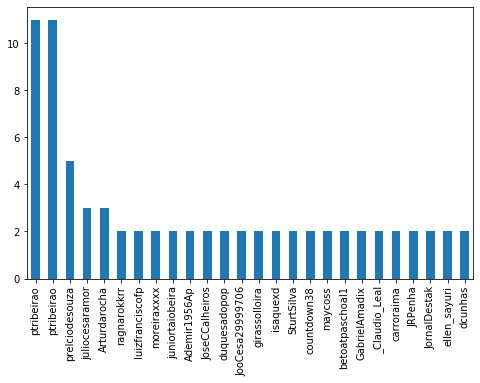

In [69]:
ax = cont_usuarios_data.sort_values(by='Tweets',ascending=False)['Tweets'][:26].plot(figsize = (8,5), kind='bar')
ax.set_xticklabels(cont_usuarios_data.sort_values(by='Tweets',ascending=False)['Usuários'].values[:26])

<h3>Resultar análise do número de tweets/usuário</h3>
<p>(Exibir analises em forma gráfica para cada arquivo)</p>